## Nonlinear Models

Here we explore the use of nonlinear models using some tools in R

In [1]:
library(ISLR)
attach(Wage)

First we will use polynomial, and focus on a single predictor age

In [2]:
fit=lm(wage~poly(age,4), data=Wage)
summary(fit)


Call:
lm(formula = wage ~ poly(age, 4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7287 153.283  < 2e-16 ***
poly(age, 4)1  447.0679    39.9148  11.201  < 2e-16 ***
poly(age, 4)2 -478.3158    39.9148 -11.983  < 2e-16 ***
poly(age, 4)3  125.5217    39.9148   3.145  0.00168 ** 
poly(age, 4)4  -77.9112    39.9148  -1.952  0.05104 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


The 'poly()' function generates a basis of \*orthogonal polynomials\*
Lets make a plot of the fitted function, along with the standard errors of the fit.

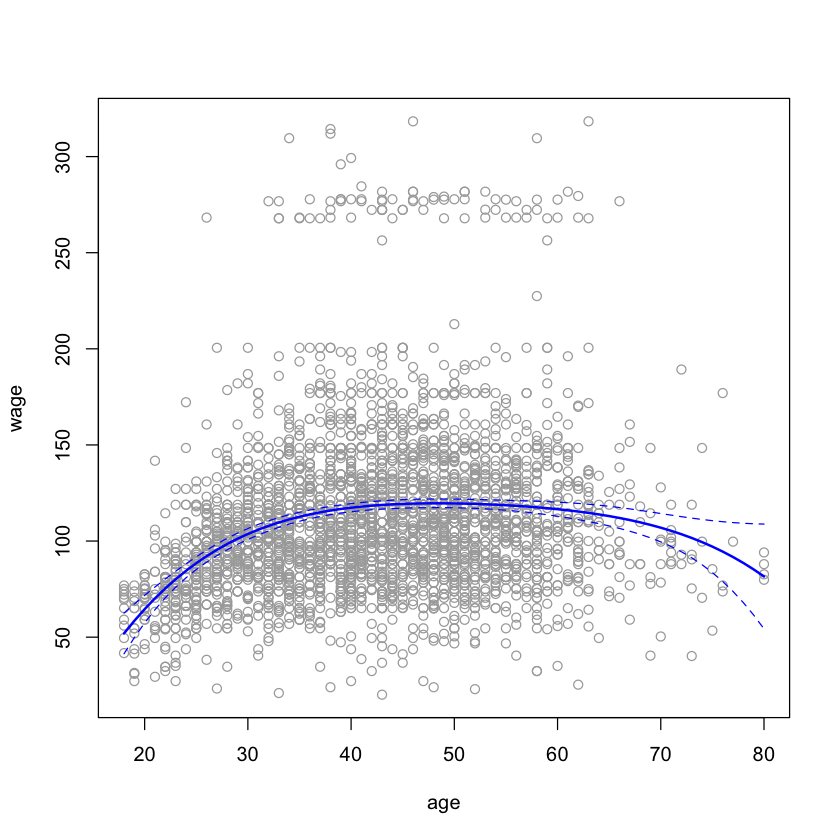

In [4]:
agelims=range(age)
age.grid=seq(from=agelims[1], to=agelims[2])
preds=predict(fit, newdata=list(age=age.grid), se=TRUE)
se.bands=cbind(preds$fit+2*preds$se,preds$fit-2*preds$se)
plot(age,wage, col='darkgrey')
lines(age.grid, preds$fit,lwd=2,col='blue')
matlines(age.grid,se.bands,col = 'blue', lty=2)

There are other more direct ways of doing this in R. For example

In [5]:
fita = lm(wage~age+I(age^2)+I(age^3)+I(age^4),data=Wage)
summary(fita)


Call:
lm(formula = wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.842e+02  6.004e+01  -3.067 0.002180 ** 
age          2.125e+01  5.887e+00   3.609 0.000312 ***
I(age^2)    -5.639e-01  2.061e-01  -2.736 0.006261 ** 
I(age^3)     6.811e-03  3.066e-03   2.221 0.026398 *  
I(age^4)    -3.204e-05  1.641e-05  -1.952 0.051039 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


Here `I()` is a wrapper function; we need it because `age^2` means somthing to the fomular language, while `I(age^2)` is protected.
The cofficients are different to those we got before! However, the fits are the same:

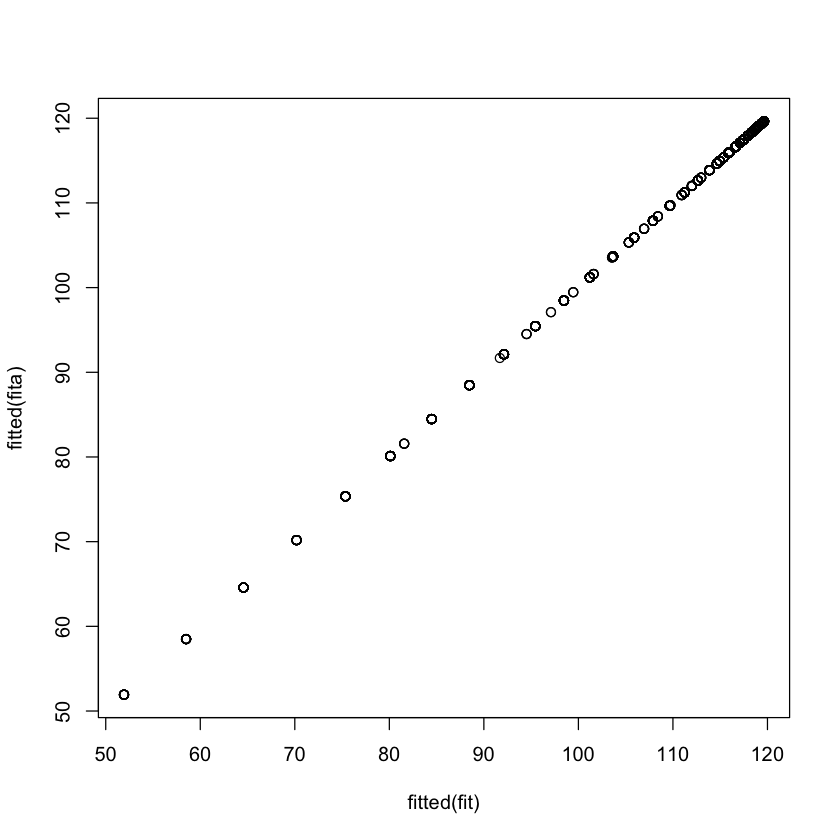

In [6]:
plot(fitted(fit), fitted(fita))

By using orthogonal polynomials in this simple way,it turns out that we can separately test for each coefficient. So if we look at the sumary again, we can see that the linear, quaratic and cubic terms are significant, but not the quartic.

In [7]:
summary(fit)


Call:
lm(formula = wage ~ poly(age, 4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7287 153.283  < 2e-16 ***
poly(age, 4)1  447.0679    39.9148  11.201  < 2e-16 ***
poly(age, 4)2 -478.3158    39.9148 -11.983  < 2e-16 ***
poly(age, 4)3  125.5217    39.9148   3.145  0.00168 ** 
poly(age, 4)4  -77.9112    39.9148  -1.952  0.05104 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


This only works with linear regeression, and if there is a single predictor. In general we would use `anova()` as this next example demonstrates.

In [8]:
fita=lm(wage~education, data=Wage)
fitb=lm(wage~education+age, data=Wage)
fitc=lm(wage~education+poly(age, 2), data=Wage)
fitd=lm(wage~education+poly(age, 3), data=Wage)
anova(fita, fitb, fitc, fitd)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2995,3995721,NA,NA,NA,NA
2994,3867992,1,127728.88,102.737760,9.215004e-24
2993,3725395,1,142597.10,114.696898,2.728971e-26
2992,3719809,1,5586.66,4.493588,3.410431e-02


### Polynomial logistic regression

Now we fit a logistic regression model to a binary response variable, constructed from `wage`. We code the big earners (`>250K`) as 1, else 0.

In [11]:
fit=glm(I(wage>250)~poly(age,3), data=Wage, family=binomial)
summary(fit)
preds=predict(fit,list(age=age.grid), se=T)
se.bands=preds$fit + cbind(fit=0, lower=-2*preds$se, upper=2 * preds$se)
se.bands[1:5,]


Call:
glm(formula = I(wage > 250) ~ poly(age, 3), family = binomial, 
    data = Wage)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2808  -0.2736  -0.2487  -0.1758   3.2868  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.8486     0.1597 -24.100  < 2e-16 ***
poly(age, 3)1  37.8846    11.4818   3.300 0.000968 ***
poly(age, 3)2 -29.5129    10.5626  -2.794 0.005205 ** 
poly(age, 3)3   9.7966     8.9990   1.089 0.276317    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 730.53  on 2999  degrees of freedom
Residual deviance: 707.92  on 2996  degrees of freedom
AIC: 715.92

Number of Fisher Scoring iterations: 8


fit,lower,upper
-7.664756,-10.759826,-4.569686
-7.324776,-10.106699,-4.542852
-7.001732,-9.492821,-4.510643
-6.695229,-8.917158,-4.473300
-6.404868,-8.378691,-4.431045


We have done the computation on the logit scale. To transform to probability scale we need to apply the inverse logit mapping

$$ p = \frac{e^\eta}{1+e^\eta}. $$

We can do that simultaneously for all three column of `se.bands`:

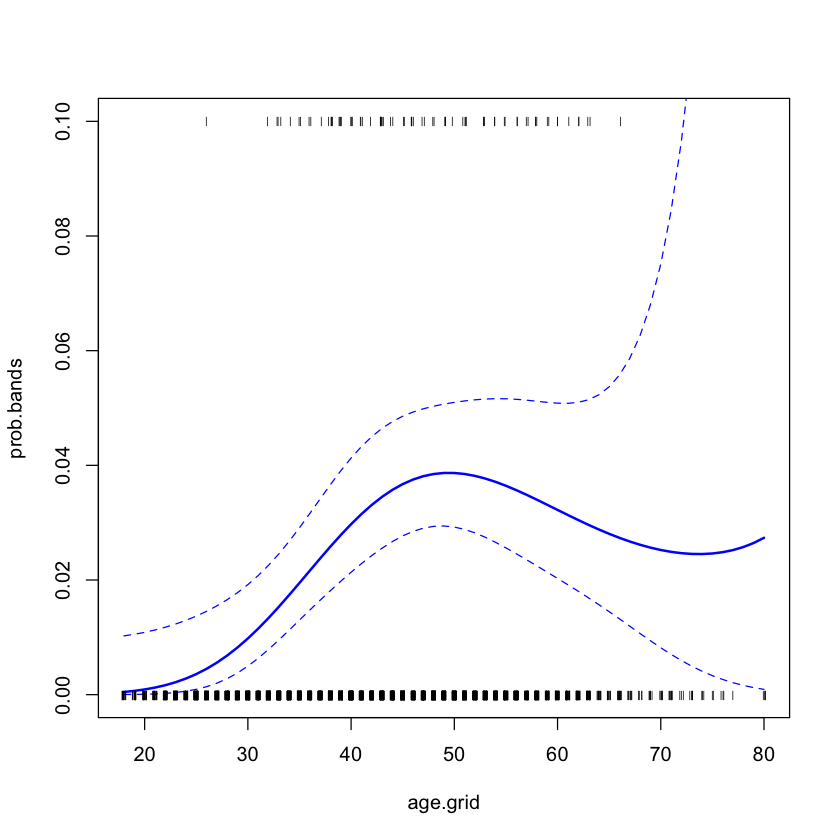

In [13]:
prob.bands = exp(se.bands)/(1 + exp(se.bands))
matplot(age.grid, prob.bands,col='blue', lwd=c(2, 1, 1), lty=c(1,2,2),type='l', ylim=c(0,.1))
points(jitter(age), I(wage>250)/10, pch="|", cex=.5)

### Splines

Splines are more flexible than polynomials, but the idea is rather similar.

Here we will explore cubic splines

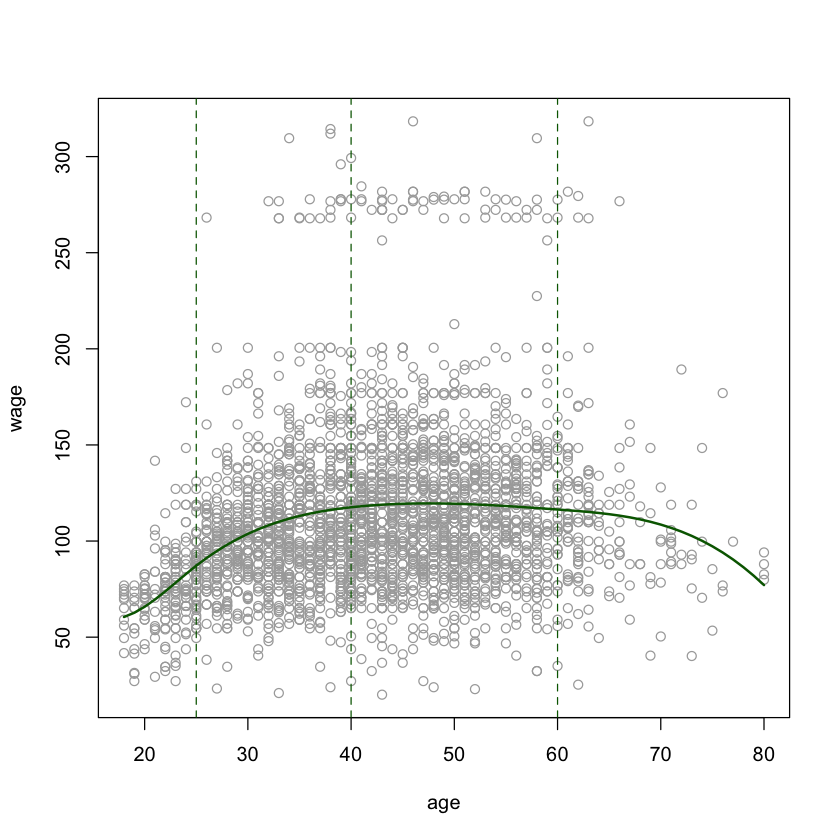

In [21]:
library(splines)
fit=lm(wage~bs(age, knots=c(25,40,60)), data=Wage)
plot(age,wage,col='darkgrey')
lines(age.grid, predict(fit,list(age=age.grid)),col='darkgreen', lwd=2)
abline(v=c(25,40, 60), lty=2, col='darkgreen')

The smoothing splines does not require knot selection, but it does have a smoothing parameter, which can conveniently be specified via the effective degrees of freedom or `df`

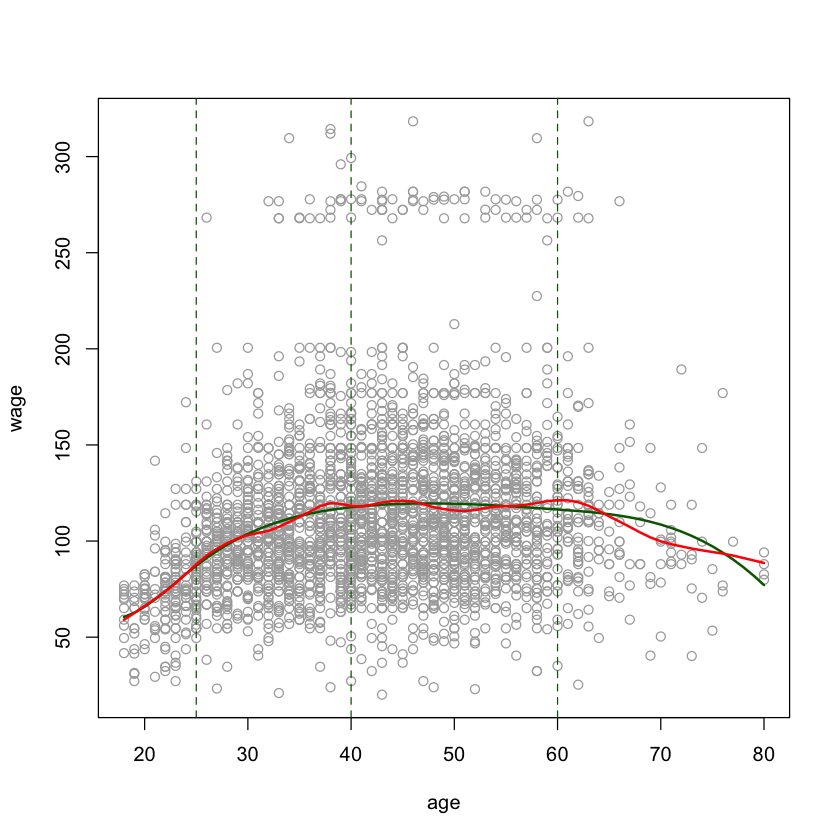

In [22]:
fit1=smooth.spline(age,wage,df=16)
plot(age,wage,col='darkgrey')
lines(age.grid, predict(fit,list(age=age.grid)),col='darkgreen', lwd=2)
abline(v=c(25,40, 60), lty=2, col='darkgreen')
lines(fit1,col='red', lwd=2)

Or we can use LOO cross-validation to select the smoothing parameter for us automatically:

Warning message in smooth.spline(age, wage, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”

Call:
smooth.spline(x = age, y = wage, cv = TRUE)

Smoothing Parameter  spar= 0.6988943  lambda= 0.02792303 (12 iterations)
Equivalent Degrees of Freedom (Df): 6.794596
Penalized Criterion (RSS): 75215.9
PRESS(l.o.o. CV): 1593.383

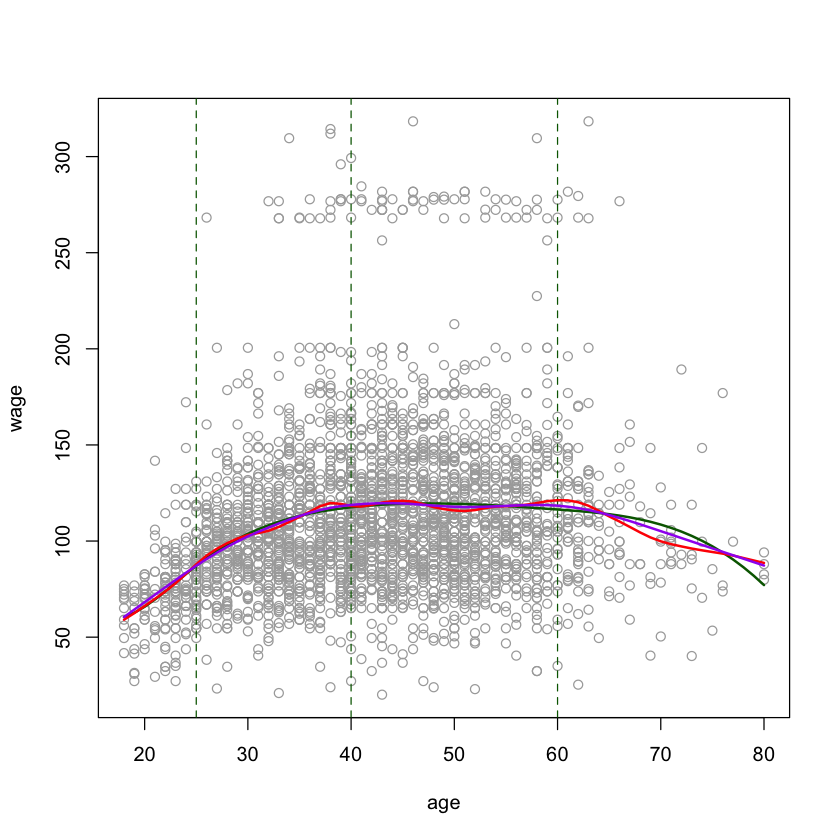

In [25]:
fit2 = smooth.spline(age,wage,cv=TRUE)
plot(age,wage,col='darkgrey')
lines(age.grid, predict(fit,list(age=age.grid)),col='darkgreen', lwd=2)
abline(v=c(25,40, 60), lty=2, col='darkgreen')
lines(fit1,col='red', lwd=2)
lines(fit2, col='purple', lwd=2)
fit2

### Generalized Addictive Models

So far we have focused on fitting models with mostly single nonlinear terms.

The `gam` package makes it easier to work with multiple nonlinear terms. In addition it knows how to plot these functions and their standard errors.

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”

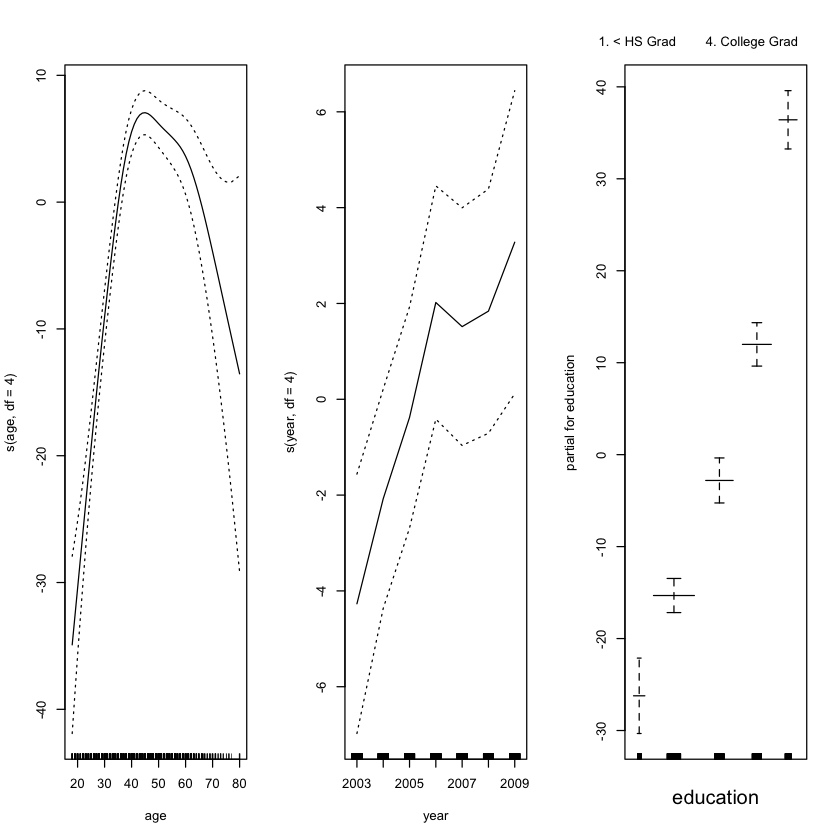

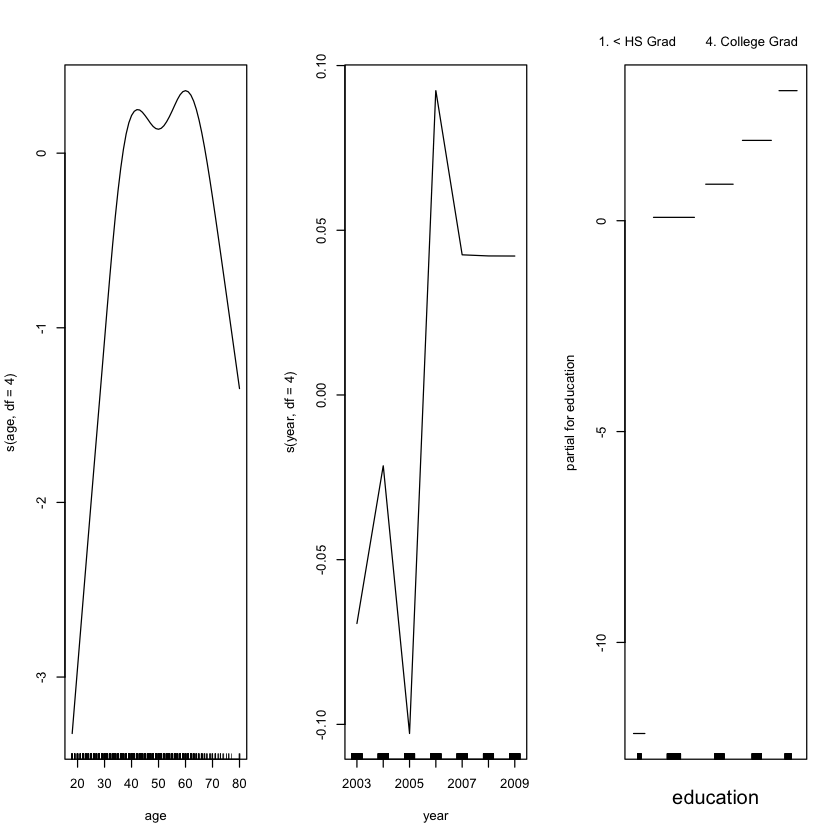

In [30]:
library(gam)
gam1=gam(wage~s(age,df=4)+s(year,df=4)+education,data=Wage)
par(mfrow=c(1,3))
plot(gam1,se=T)
gam2=gam(I(wage>250)~s(age,df=4)+s(year, df=4)+education, data=Wage, family = binomial)
plot(gam2)

Let's see if we need a nonlinear term for year

In [32]:
gam2a=gam(I(wage>250)~s(age,df=4)+year+education, data=Wage, family = binomial)
anova(gam2a, gam2, test='Chisq')

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2990,603.7774,NA,NA,NA
2987,602.8725,2.999983,0.9049826,0.8242229


One nice feature  of the `gam` package is that it knows how to plot the functions nicely, even for models fit by `lm` or `glm`.

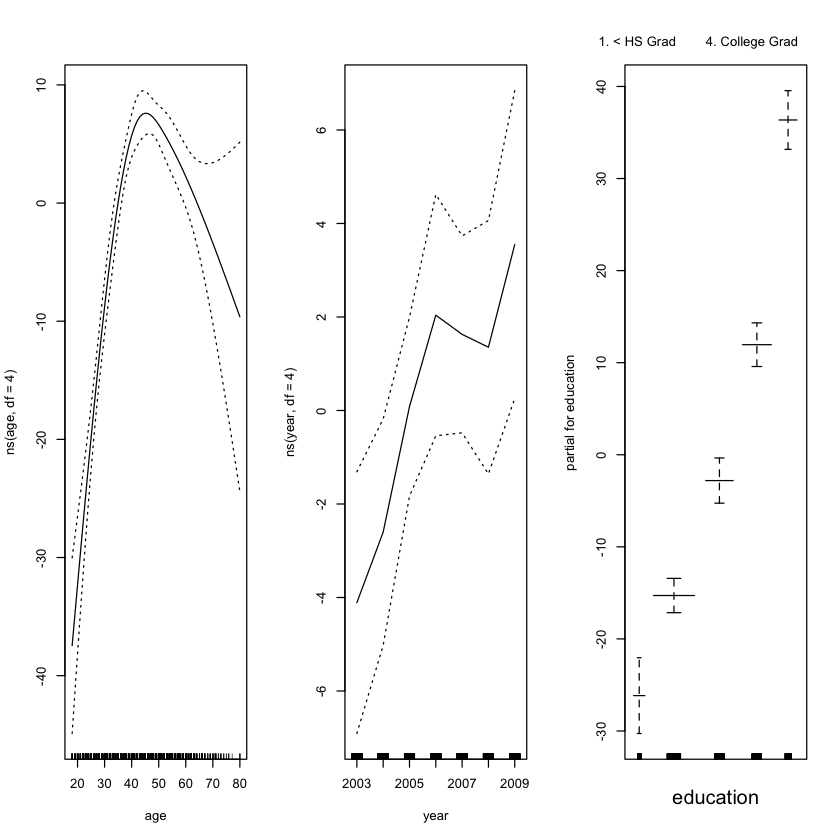

In [34]:
par(mfrow=c(1, 3))
lm1 = lm(wage~ns(age,df=4)+ns(year, df=4) + education, data=Wage)
plot.Gam(lm1, se=T)